In [164]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from pathlib import Path
import os.path
from PIL import Image

In [165]:
def read_data(path):
    df = pd.read_parquet(path)
    return df

def read_json(path):
    with open(path) as response:
        result = json.load(response)
    return result

In [166]:
data = read_data('C:\\Users\\Ansam\\Documents\\github\\geospatial\\data\\final_dataset.parquet')

data = data.drop(columns = ['kingdom', 'class', 'Unnamed: 0', 'phylum', 'order', 'scientificName', 'verbatimScientificName', 'countryCode'])

regions = read_json('C:\\Users\\Ansam\\Documents\\github\\geospatial\\data\\georef-switzerland-kanton.geojson')

alpine_Cantons = ['Valais', 'Graubünden', 'Uri', 'Bern', 'Ticino', 'Schwyz', 'Glarus', 'Obwalden', 'Nidwalden', 'Appenzell', 'St. Gallen']
plateau_Cantons = ['Zürich', 'Aargau', 'Luzern', 'Thurgau', 'Solothurn', 'Basel', 'Schaffhausen', 'Zug', 'Fribourg', 'Genève']
jura_Cantons = ['Neuchâtel', 'Jura', 'Vaud']

# Create a mapping dictionary for each type
mapping = {}
for canton in alpine_Cantons:
    mapping[canton] = 'Alpine'
for canton in plateau_Cantons:
    mapping[canton] = 'Plateau'
for canton in jura_Cantons:
    mapping[canton] = 'Jura'

# Map the types to a new 'Type' column in the DataFrame
data['Landscape'] = data['stateProvince'].map(mapping)

In [167]:
data.columns

Index(['family', 'genus', 'species', 'taxonRank', 'stateProvince',
       'occurrenceStatus', 'publishingOrgKey', 'decimalLatitude',
       'decimalLongitude', 'coordinateUncertaintyInMeters', 'elevation', 'day',
       'Month', 'Year', 'basisOfRecord', 'Temperature', 'Precipitation',
       'Landscape'],
      dtype='object')

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114036 entries, 0 to 114035
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   family                         114036 non-null  object 
 1   genus                          114036 non-null  object 
 2   species                        114036 non-null  object 
 3   taxonRank                      114036 non-null  object 
 4   stateProvince                  114036 non-null  object 
 5   occurrenceStatus               114036 non-null  object 
 6   publishingOrgKey               114036 non-null  object 
 7   decimalLatitude                114036 non-null  float64
 8   decimalLongitude               114036 non-null  float64
 9   coordinateUncertaintyInMeters  114036 non-null  float64
 10  elevation                      114036 non-null  float64
 11  day                            114036 non-null  float64
 12  Month                         

In [169]:
data.occurrenceStatus.unique()

array(['PRESENT'], dtype=object)

In [170]:
data = data.replace({'PRESENT': 1})

In [171]:
# sorted(data.Year.unique())
data.Year.unique()

array([2001, 1996, 1997, 2005, 2004, 2003, 2006, 1994, 1999, 2007, 2008,
       2014, 2013, 2018, 2019, 2017, 2016, 2009, 2020, 2012, 2021, 2015,
       2010, 1995, 1991, 1986, 1984, 1983, 1980, 1979, 2002, 1998, 1982,
       2000, 1975, 1992, 1989, 1990, 1993, 1987, 2011, 1985, 1988, 1927,
       1928, 1981, 1924, 1923, 1926, 1925, 1909], dtype=int64)

In [182]:
data['day'] = 1
data['date'] = pd.to_datetime(data[['Year', 'Month', 'day']])

Data Exploration and Visualization:

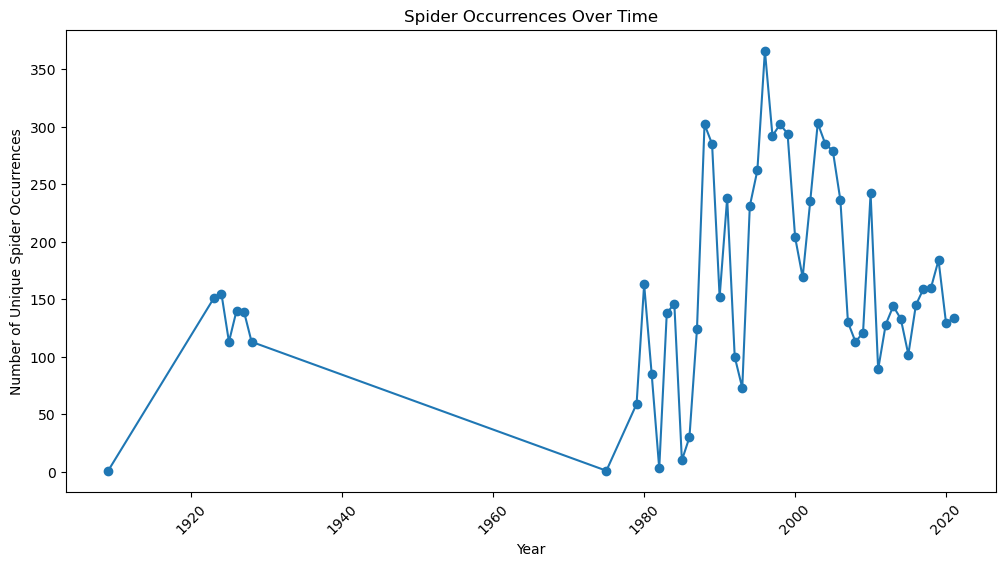

In [183]:
# Group by year and count unique spider occurrences
spider_occurrences = data.groupby('Year')['species'].nunique()

# Plot spider occurrences over time
plt.figure(figsize=(12, 6))
spider_occurrences.plot(marker='o')
plt.title('Spider Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Unique Spider Occurrences')
plt.xticks(rotation=45)
plt.show()

In [184]:
# Group occurrences by month and calculate average temperature and precipitation
monthly_data = data.groupby('Month').agg({'Temperature': 'mean', 'Precipitation': 'mean', 'occurrenceStatus': 'sum'}).reset_index()

# Plotting temperature and spider occurrences
fig = px.scatter(monthly_data, x='Temperature', y='occurrenceStatus', trendline='ols', title='Temperature vs. Spider Occurrences')
fig.update_layout(xaxis_title='Temperature', yaxis_title='Spider Occurrences')
fig.show()

In [185]:
# Plotting precipitation and spider occurrences
fig = px.scatter(monthly_data, x='Precipitation', y='occurrenceStatus', trendline='ols', title='Precipitation vs. Spider Occurrences')
fig.update_layout(xaxis_title='Precipitation', yaxis_title='Spider Occurrences')
fig.show()

In [186]:
# Comparing spider occurrences across landscape types
landscape_counts = data.groupby('Landscape')['occurrenceStatus'].sum().reset_index()

fig = px.bar(landscape_counts, x='Landscape', y='occurrenceStatus', title='Spider Occurrences by Landscape')
fig.update_layout(xaxis_title='Landscape', yaxis_title='Spider Occurrences')
fig.show()

In [191]:
data2 = data[data['Year'] > 1980]

# Convert the 'Year' column to datetime type
# data2['Year'] = pd.to_datetime(data2['Year'], format='%Y')

# Group data by month and calculate average temperature, precipitation, and spider occurrences
monthly_data = data2.groupby('date').agg({'Temperature': 'mean', 'Precipitation': 'mean', 'occurrenceStatus': 'sum', 'Landscape': 'first'}).reset_index()
monthly_data.head()

,date,Temperature,Precipitation,occurrenceStatus,Landscape
0,1981-04-01,10.7,8.9,40,Jura
1,1981-05-01,12.5,139.5,70,Jura
2,1981-06-01,16.3,67.2,79,Jura
3,1981-07-01,17.2,74.2,81,Jura
4,1981-08-01,19.1,38.7,18,Jura


In [192]:
# Calculate moving average for temperature
window_size = 10  # Adjust the window size as needed
monthly_data['Temperature_MA'] = monthly_data['Temperature'].rolling(window_size, center=True).mean()

# Create the subplots with shared x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add temperature line
fig.add_trace(go.Scatter(x=monthly_data['date'], y=monthly_data['Temperature'], mode='lines', name='Temperature'), row=1, col=1)

# Add moving average line for temperature
fig.add_trace(go.Scatter(x=monthly_data['date'], y=monthly_data['Temperature_MA'], mode='lines', name=f'Temperature (Moving Average {window_size})'), row=1, col=1)

# Add occurrences line
fig.add_trace(go.Scatter(x=monthly_data['date'], y=monthly_data['occurrenceStatus'], mode='lines', name='Occurrences'), row=2, col=1)

# Set layout
fig.update_layout(title='Monthly Temperature and Occurrences Time Series',
                  xaxis_title='Date',
                  yaxis_title='Temperature',
                  yaxis2_title='Occurrences',
                  height=600)

# Show the plot
fig.show()

In [193]:
# Calculate moving average for temperature
window_size = 10  # Adjust the window size as needed
monthly_data['Precipitation_MA'] = monthly_data['Precipitation'].rolling(window_size, center=True).mean()

# Create the subplots with shared x-axis
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add temperature line
fig.add_trace(go.Scatter(x=monthly_data['date'], y=monthly_data['Precipitation'], mode='lines', name='Precipitation'), row=1, col=1)

# Add moving average line for temperature
fig.add_trace(go.Scatter(x=monthly_data['date'], y=monthly_data['Precipitation_MA'], mode='lines', name=f'Precipitation (Moving Average {window_size})'), row=1, col=1)

# Add occurrences line
fig.add_trace(go.Scatter(x=monthly_data['date'], y=monthly_data['occurrenceStatus'], mode='lines', name='Occurrences'), row=2, col=1)

# Set layout
fig.update_layout(title='Monthly Precipitation and Occurrences Time Series',
                  xaxis_title='Date',
                  yaxis_title='Precipitation',
                  yaxis2_title='Occurrences',
                  height=600)

# Show the plot
fig.show()

In [194]:
# Create a list of unique landscapes
landscapes = monthly_data['Landscape'].unique()

# Create the plot for spider occurrences by landscape
fig = go.Figure()

# Iterate over landscapes
for landscape in landscapes:
    # Filter data for the current landscape
    landscape_data = monthly_data[monthly_data['Landscape'] == landscape]
    
    # Add occurrences line for the current landscape
    fig.add_trace(go.Scatter(x=landscape_data['date'], y=landscape_data['occurrenceStatus'], mode='lines', name=landscape))

# Set layout
fig.update_layout(title='Monthly Spider Occurrences by Landscape',
                  xaxis_title='Date',
                  yaxis_title='Occurrences')

# Show the plot
fig.show()

Statistical tests

In [195]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value between temperature and spider occurrences
correlation_coefficient_temp, p_value_temp = pearsonr(monthly_data['Temperature'], monthly_data['occurrenceStatus'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient (Temperature vs Occurrences):", correlation_coefficient_temp)
print("p-value (Temperature vs Occurrences):", p_value_temp)

# Check for statistical significance
alpha = 0.05  # Set the significance level

if p_value_temp < alpha:
    print("There is a statistically significant relationship between temperature and spider occurrences.")
else:
    print("There is no statistically significant relationship between temperature and spider occurrences.")

Correlation Coefficient (Temperature vs Occurrences): 0.3001219205872613
p-value (Temperature vs Occurrences): 3.607917389920756e-10
There is a statistically significant relationship between temperature and spider occurrences.


In [196]:
# Calculate the correlation coefficient and p-value between precipitation and spider occurrences
correlation_coefficient_precip, p_value_precip = pearsonr(monthly_data['Precipitation'], monthly_data['occurrenceStatus'])

# Print the correlation coefficient and p-value
print("Correlation Coefficient (Precipitation vs Occurrences):", correlation_coefficient_precip)
print("p-value (Precipitation vs Occurrences):", p_value_precip)

# Check for statistical significance
alpha = 0.05  # Set the significance level

if p_value_precip < alpha:
    print("There is a statistically significant relationship between precipitation and spider occurrences.")
else:
    print("There is no statistically significant relationship between precipitation and spider occurrences.")

Correlation Coefficient (Precipitation vs Occurrences): 0.12729002599544506
p-value (Precipitation vs Occurrences): 0.009096757212835545
There is a statistically significant relationship between precipitation and spider occurrences.


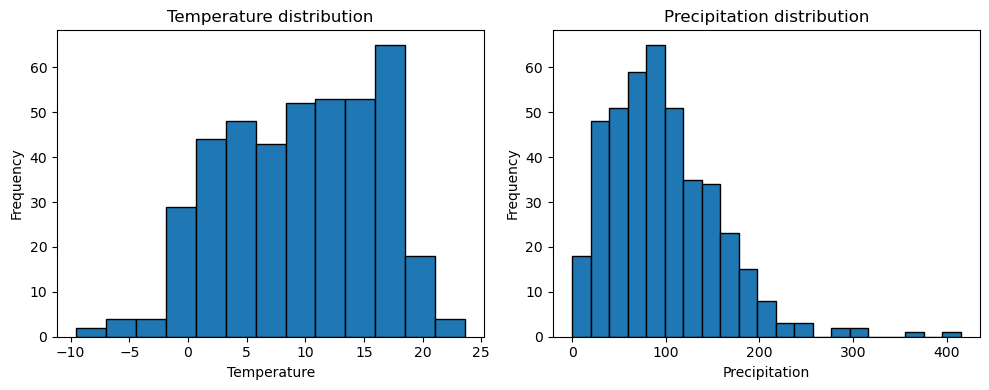

In [197]:
# checking if the data is normally distributed

# Creating a figure with two subplots in one row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the first histogram
ax1.hist(monthly_data['Temperature'], bins='auto', edgecolor='black')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Frequency')
ax1.set_title('Temperature distribution')

# Plotting the second histogram
ax2.hist(monthly_data['Precipitation'], bins='auto', edgecolor='black')
ax2.set_xlabel('Precipitation')
ax2.set_ylabel('Frequency')
ax2.set_title('Precipitation distribution')

# Adjusting the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [198]:
# performing a wilicoxon test because it does not assume normal distribution
from scipy.stats import ranksums

statistic_temp, p_value_temp = ranksums(monthly_data['Temperature'], monthly_data['occurrenceStatus'])

# Print the test statistic and p-value
print("Wilcoxon Rank-Sum Test (Temperature vs Occurrences):")
print("Test Statistic:", statistic_temp)
print("p-value:", p_value_temp)

# Check for statistical significance
alpha = 0.05  # Set the significance level

if p_value_temp < alpha:
    print("There is a statistically significant relationship between temperature and spider occurrences.")
else:
    print("There is no statistically significant relationship between temperature and spider occurrences.")


Wilcoxon Rank-Sum Test (Temperature vs Occurrences):
Test Statistic: -12.832957381396875
p-value: 1.071929376200353e-37
There is a statistically significant relationship between temperature and spider occurrences.


In [199]:
# Perform the Wilcoxon rank-sum test between precipitation and spider occurrences
statistic_precip, p_value_precip = ranksums(monthly_data['Precipitation'], monthly_data['occurrenceStatus'])

# Print the test statistic and p-value
print("Wilcoxon Rank-Sum Test (Precipitation vs Occurrences):")
print("Test Statistic:", statistic_precip)
print("p-value:", p_value_precip)

# Check for statistical significance
alpha = 0.05  # Set the significance level

if p_value_precip < alpha:
    print("There is a statistically significant relationship between precipitation and spider occurrences.")
else:
    print("There is no statistically significant relationship between precipitation and spider occurrences.")

Wilcoxon Rank-Sum Test (Precipitation vs Occurrences):
Test Statistic: 2.6148001594950405
p-value: 0.008927967530542657
There is a statistically significant relationship between precipitation and spider occurrences.


exploring the efeects of landscape more

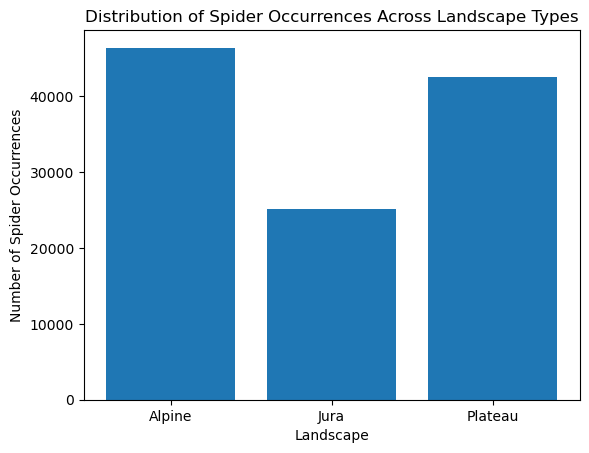

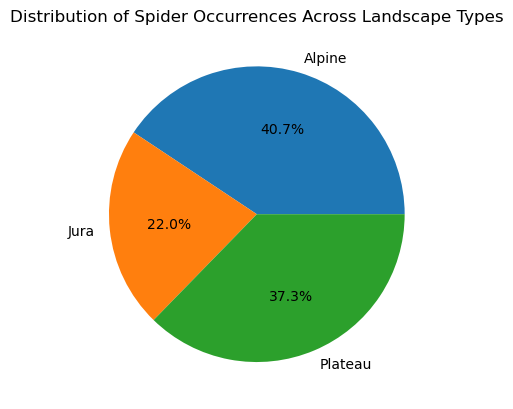

In [200]:
# Group data by landscape and calculate the total number of spider occurrences in each landscape
landscape_counts = data.groupby('Landscape')['occurrenceStatus'].sum()

# Create a bar chart to visualize the distribution of spider occurrences across landscape types
plt.bar(landscape_counts.index, landscape_counts.values)
plt.xlabel('Landscape')
plt.ylabel('Number of Spider Occurrences')
plt.title('Distribution of Spider Occurrences Across Landscape Types')
plt.show()

# Alternatively, you can create a pie chart to visualize the distribution
plt.pie(landscape_counts.values, labels=landscape_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Spider Occurrences Across Landscape Types')
plt.show()

In [201]:
from scipy.stats import kruskal

# because I have landscape which is a cetegorical data and monthly occurences in this landscape better to perform Kruskal-Wallis test
# which is a non-parametric test used to determine if there are differences between multiple groups
# you can consider each landscape type as a group and the number of monthly occurrences as the variable of interest

# Group the data by landscape and obtain the occurrences for each landscape
landscape_groups = [group['occurrenceStatus'] for _, group in monthly_data.groupby('Landscape')]

# Perform the Kruskal-Wallis test
statistic, p_value = kruskal(*landscape_groups)

# Print the test statistic and p-value
print("Kruskal-Wallis Test Statistic:", statistic)
print("p-value:", p_value)

# Check for statistical significance
alpha = 0.05  # Set the significance level

if p_value < alpha:
    print("There are statistically significant differences in the number of occurrences across landscape types.")
else:
    print("There are no statistically significant differences in the number of occurrences across landscape types.")

Kruskal-Wallis Test Statistic: 50.178970719054696
p-value: 1.2699158817154567e-11
There are statistically significant differences in the number of occurrences across landscape types.


Detection of New Spider Species:

In [202]:
# Extract relevant columns from the dataset
species_data = data2[['Year', 'species']]

# Group the data by Year and collect the unique spider species observed in each year
species_by_year = species_data.groupby('Year')['species'].unique()

###
# Print the spider species observed each year
###
for year, species_list in species_by_year.items():
    print(f"Year {year}: {', '.join(species_list)}")

Year 1981: Trochosa terricola, Evarcha arcuata, Alopecosa trabalis, Metellina segmentata, Heliophanus cupreus, Neottiura bimaculata, Pardosa hortensis, Alopecosa cuneata, Ozyptila scabricula, Pocadicnemis pumila, Agroeca cuprea, Zelotes petrensis, Misumena vatia, Minicia marginella, Arctosa lutetiana, Atypus affinis, Linyphia triangularis, Evarcha falcata, Pardosa bifasciata, Pardosa palustris, Thanatus formicinus, Neottiura suaveolens, Tapinopa longidens, Ozyptila atomaria, Drassyllus praeficus, Ozyptila claveata, Hypsosinga albovittata, Aulonia albimana, Drassodes pubescens, Xysticus erraticus, Diplostyla concolor, Palliduphantes pallidus, Robertus neglectus, Pardosa monticola, Xysticus kochi, Walckenaeria antica, Micaria guttulata, Bathyphantes gracilis, Oedothorax retusus, Atypus piceus, Clubiona similis, Euophrys frontalis, Pachygnatha degeeri, Drassyllus pusillus, Philodromus cespitum, Xysticus cristatus, Tenuiphantes mengei, Sintula corniger, Pellenes tripunctatus, Metopobactrus

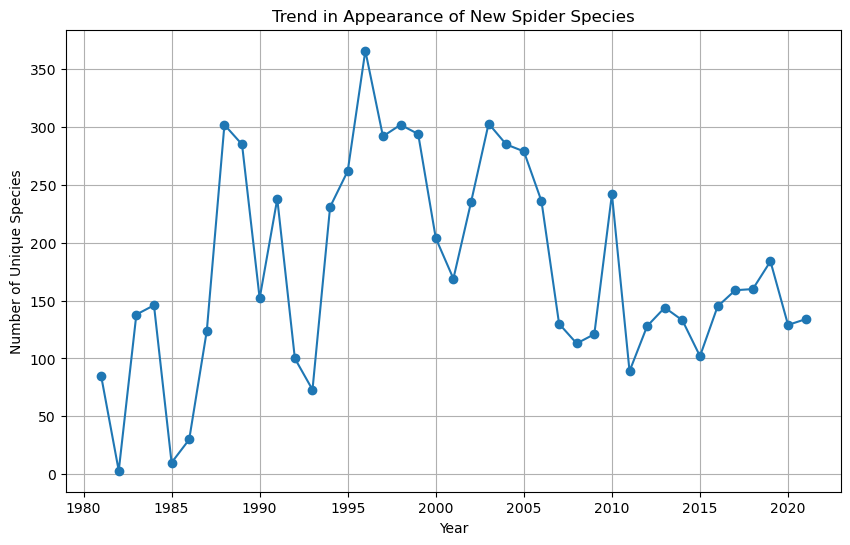

In [203]:
# Group the data by Year and species, calculate the count of unique species for each year
species_count = species_data.groupby('Year')['species'].nunique()

# Create a line plot or bar chart to visualize the trend
plt.figure(figsize=(10, 6))
species_count.plot(kind='line', marker='o')
plt.title('Trend in Appearance of New Spider Species')
plt.xlabel('Year')
plt.ylabel('Number of Unique Species')
plt.grid(True)
plt.show()

In [207]:
# checking if there are spiders that were first detected on a certain year, new type of spider appearing

# Sort the data by Year in ascending order
species_data = species_data.sort_values('Year')

# Create a dictionary to store the detected species for each year
detected_species = {}

# Iterate over the data to identify species detected in each year
for index, row in species_data.iterrows():
    year = row['Year']
    species = row['species']
    
    # Check if it's the first year in the list
    if year == species_data['Year'].min():
        detected_species[year] = set(species_data[species_data['Year'] == year]['species'])
    else:
        detected_previous_years = set()
        # Loop through all previous years
        for prev_year in range(species_data['Year'].min(), year):
            # Check if species detected in previous years
            if prev_year in detected_species:
                detected_previous_years.update(detected_species[prev_year])
        # Check if species is not detected in previous years
        if species not in detected_previous_years:
            if year not in detected_species:
                detected_species[year] = set()
            detected_species[year].add(species)

# Print the unique newly detected species in each year
for year, species_set in detected_species.items():
    print(f"Year {year}: {', '.join(species_set)}")

Year 1981: Synema globosum, Pirata piraticus, Oedothorax retusus, Drassodes pubescens, Pocadicnemis pumila, Aulonia albimana, Mangora acalypha, Zelotes petrensis, Palliduphantes pallidus, Pardosa pullata, Micaria guttulata, Metellina segmentata, Pardosa palustris, Evarcha falcata, Pardosa monticola, Misumena vatia, Panamomops sulcifrons, Drassyllus pusillus, Trochosa terricola, Tenuiphantes mengei, Dysdera erythrina, Episinus truncatus, Xysticus cristatus, Erigone atra, Micrargus subaequalis, Agyneta simplicitarsis, Pardosa amentata, Pardosa bifasciata, Drassyllus praeficus, Enoplognatha ovata, Agroeca cuprea, Tapinopa longidens, Clubiona similis, Heliophanus flavipes, Evarcha arcuata, Ozyptila scabricula, Philodromus cespitum, Diplostyla concolor, Pachygnatha degeeri, Phrurolithus festivus, Pellenes tripunctatus, Phylloneta impressa, Metopobactrus prominulus, Linyphia triangularis, Oedothorax apicatus, Bathyphantes gracilis, Walckenaeria antica, Hahnia pusilla, Agyneta rurestris, Robe

In [209]:
# Create a histogram to visualize the number of new species detected each year
years = list(detected_species.keys())
new_species_counts = [len(species_set) for species_set in detected_species.values()]

# Create a hover text for each bar
hover_text = [f"Year: {year}<br>Number of New Species: {count}" for year, count in zip(years, new_species_counts)]

# Create the bar trace
bar_trace = go.Bar(x=years, y=new_species_counts, hovertext=hover_text)

# Create the labels for the bar values
label_text = [str(count) for count in new_species_counts]

# Create the annotations for the bar values
annotations = [dict(x=x, y=y, text=text, showarrow=False, font=dict(size=12))
               for x, y, text in zip(years, new_species_counts, label_text)]

# Create the layout
layout = go.Layout(
    title='Number of New Spider Species Detected Each Year',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of New Species Detected'),
    annotations=annotations
)

# Create the figure and add the trace
fig = go.Figure(data=[bar_trace], layout=layout)

# Show the figure
fig.show()
